In [ ]:
#Name: Kranti Vasant Adsul
#USC ID: 5747 - 0737 - 86
#
#   Question 3
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from sklearn.metrics import ConfusionMatrixDisplay
import torchvision.transforms as transforms
import torch.nn.functional as func
from torch.utils.data import Dataset
from torchvision import *
from torchsummary import summary

In [2]:
#Load train set and test ste
train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True, transform= transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform= transforms.ToTensor())
trainset_loader = torch.utils.data.DataLoader(train_dataset,batch_size=100,shuffle=True, num_workers=2)
testset_loader = torch.utils.data.DataLoader(test_dataset,batch_size=200,shuffle=True, num_workers=2)
true_class = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse','ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
#Creating the model
dim_pixel = 32 * 32 * 3
class Layer(nn.Module):
    def __init__(self):
        super(Layer, self).__init__()
        self.hiddenlayer1 = nn.Linear(dim_pixel, 256)
        self.hiddenlayer2 = nn.Linear(256, 128)
        self.dropout = nn.Dropout(p = 0.3)
        self.output = nn.Linear(128, 10)
        
    def forward(self, x1):
        x1 = self.hiddenlayer1(x1)
        x1 = func.relu(x1)
        x1 = self.dropout(x1)
        x1 = self.hiddenlayer2(x1)
        x1 = func.relu(x1)
        x1 = self.dropout(x1)
        x1 = self.output(x1)
        return x1

In [4]:
#Instantiating the model
model = Layer()

In [5]:
#Generating summary of the model
summary(model, (1, 1, dim_pixel))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1, 256]         786,688
           Dropout-2            [-1, 1, 1, 256]               0
            Linear-3            [-1, 1, 1, 128]          32,896
           Dropout-4            [-1, 1, 1, 128]               0
            Linear-5             [-1, 1, 1, 10]           1,290
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 3.13
Estimated Total Size (MB): 3.15
----------------------------------------------------------------


In [6]:
lossfunction = nn.CrossEntropyLoss()
model_optimizer = torch.optim.SGD(model.parameters(), lr=0.04, weight_decay=1e-6, momentum=0.6)
test_dataset_loss_list = []
test_dataset_accuracy_list = []
tot_count = 0
epochs = 150

for epoch in range(epochs):
    for pic, label in trainset_loader:
        tot_count += 1
        model.train()
        training = pic.view(-1, dim_pixel)

        # Forward pass
        model_outputs = model(training)
        loss = lossfunction(model_outputs, label)
    
        # back-prop
        model_optimizer.zero_grad()
        loss.backward()

        # optimize
        model_optimizer.step()

        if not(tot_count % 100):
            with torch.no_grad():
                tot = 0
                corr = 0

                for pic, label in testset_loader:
                    model.eval()
                    test = pic.view(-1, dim_pixel)
                    model_output = model(test).cpu()
                    predict = torch.max(model_output, 1)[1]
                    predicted_val = predict.cpu().detach().numpy()
                    true_val = label.cpu().detach().numpy()
                    corr += np.sum(predicted_val == true_val)
                    tot += len(true_val)
                test_acc = corr * 100 / tot

                test_dataset_loss_list.append(loss.cpu().data)
                test_dataset_accuracy_list.append(test_acc)

                print(f'Epoch No.: {epoch+1:02d}, Num of iteration: {tot_count:4d}, Loss:{loss.data:.2f}, Test Accuracy: {test_acc:.2f}%')

Epoch No.: 01, Num of iteration:  100, Loss:2.10, Test Accuracy: 24.76%
Epoch No.: 01, Num of iteration:  200, Loss:2.00, Test Accuracy: 29.41%
Epoch No.: 01, Num of iteration:  300, Loss:1.98, Test Accuracy: 33.05%
Epoch No.: 01, Num of iteration:  400, Loss:1.98, Test Accuracy: 31.90%
Epoch No.: 01, Num of iteration:  500, Loss:1.94, Test Accuracy: 35.10%
Epoch No.: 02, Num of iteration:  600, Loss:1.85, Test Accuracy: 35.91%
Epoch No.: 02, Num of iteration:  700, Loss:2.03, Test Accuracy: 37.87%
Epoch No.: 02, Num of iteration:  800, Loss:1.84, Test Accuracy: 38.32%
Epoch No.: 02, Num of iteration:  900, Loss:1.84, Test Accuracy: 39.06%
Epoch No.: 02, Num of iteration: 1000, Loss:1.81, Test Accuracy: 37.15%
Epoch No.: 03, Num of iteration: 1100, Loss:1.62, Test Accuracy: 39.89%
Epoch No.: 03, Num of iteration: 1200, Loss:1.77, Test Accuracy: 39.85%
Epoch No.: 03, Num of iteration: 1300, Loss:1.84, Test Accuracy: 40.60%
Epoch No.: 03, Num of iteration: 1400, Loss:1.81, Test Accuracy:

Epoch No.: 23, Num of iteration: 11500, Loss:1.54, Test Accuracy: 50.52%
Epoch No.: 24, Num of iteration: 11600, Loss:1.44, Test Accuracy: 50.32%
Epoch No.: 24, Num of iteration: 11700, Loss:1.63, Test Accuracy: 48.77%
Epoch No.: 24, Num of iteration: 11800, Loss:1.51, Test Accuracy: 50.86%
Epoch No.: 24, Num of iteration: 11900, Loss:1.65, Test Accuracy: 50.04%
Epoch No.: 24, Num of iteration: 12000, Loss:1.54, Test Accuracy: 49.34%
Epoch No.: 25, Num of iteration: 12100, Loss:1.31, Test Accuracy: 50.06%
Epoch No.: 25, Num of iteration: 12200, Loss:1.39, Test Accuracy: 50.94%
Epoch No.: 25, Num of iteration: 12300, Loss:1.53, Test Accuracy: 50.71%
Epoch No.: 25, Num of iteration: 12400, Loss:1.54, Test Accuracy: 51.17%
Epoch No.: 25, Num of iteration: 12500, Loss:1.56, Test Accuracy: 50.82%
Epoch No.: 26, Num of iteration: 12600, Loss:1.40, Test Accuracy: 50.71%
Epoch No.: 26, Num of iteration: 12700, Loss:1.31, Test Accuracy: 49.96%
Epoch No.: 26, Num of iteration: 12800, Loss:1.42, 

Epoch No.: 46, Num of iteration: 22800, Loss:1.24, Test Accuracy: 53.02%
Epoch No.: 46, Num of iteration: 22900, Loss:1.35, Test Accuracy: 52.69%
Epoch No.: 46, Num of iteration: 23000, Loss:1.34, Test Accuracy: 51.87%
Epoch No.: 47, Num of iteration: 23100, Loss:1.28, Test Accuracy: 52.03%
Epoch No.: 47, Num of iteration: 23200, Loss:1.34, Test Accuracy: 52.02%
Epoch No.: 47, Num of iteration: 23300, Loss:1.19, Test Accuracy: 52.41%
Epoch No.: 47, Num of iteration: 23400, Loss:1.29, Test Accuracy: 52.90%
Epoch No.: 47, Num of iteration: 23500, Loss:1.41, Test Accuracy: 52.96%
Epoch No.: 48, Num of iteration: 23600, Loss:1.22, Test Accuracy: 53.28%
Epoch No.: 48, Num of iteration: 23700, Loss:1.18, Test Accuracy: 52.48%
Epoch No.: 48, Num of iteration: 23800, Loss:1.33, Test Accuracy: 52.60%
Epoch No.: 48, Num of iteration: 23900, Loss:1.33, Test Accuracy: 53.12%
Epoch No.: 48, Num of iteration: 24000, Loss:1.42, Test Accuracy: 53.26%
Epoch No.: 49, Num of iteration: 24100, Loss:1.38, 

Epoch No.: 69, Num of iteration: 34100, Loss:1.16, Test Accuracy: 54.00%
Epoch No.: 69, Num of iteration: 34200, Loss:1.10, Test Accuracy: 52.92%
Epoch No.: 69, Num of iteration: 34300, Loss:1.01, Test Accuracy: 53.58%
Epoch No.: 69, Num of iteration: 34400, Loss:1.14, Test Accuracy: 52.86%
Epoch No.: 69, Num of iteration: 34500, Loss:1.43, Test Accuracy: 53.66%
Epoch No.: 70, Num of iteration: 34600, Loss:1.31, Test Accuracy: 52.89%
Epoch No.: 70, Num of iteration: 34700, Loss:1.03, Test Accuracy: 52.94%
Epoch No.: 70, Num of iteration: 34800, Loss:1.20, Test Accuracy: 54.19%
Epoch No.: 70, Num of iteration: 34900, Loss:1.21, Test Accuracy: 54.20%
Epoch No.: 70, Num of iteration: 35000, Loss:1.21, Test Accuracy: 54.19%
Epoch No.: 71, Num of iteration: 35100, Loss:1.29, Test Accuracy: 52.89%
Epoch No.: 71, Num of iteration: 35200, Loss:1.13, Test Accuracy: 53.59%
Epoch No.: 71, Num of iteration: 35300, Loss:1.31, Test Accuracy: 53.79%
Epoch No.: 71, Num of iteration: 35400, Loss:1.17, 

Epoch No.: 91, Num of iteration: 45400, Loss:1.12, Test Accuracy: 54.66%
Epoch No.: 91, Num of iteration: 45500, Loss:1.18, Test Accuracy: 53.33%
Epoch No.: 92, Num of iteration: 45600, Loss:1.24, Test Accuracy: 53.89%
Epoch No.: 92, Num of iteration: 45700, Loss:1.11, Test Accuracy: 54.00%
Epoch No.: 92, Num of iteration: 45800, Loss:1.53, Test Accuracy: 53.99%
Epoch No.: 92, Num of iteration: 45900, Loss:1.12, Test Accuracy: 53.37%
Epoch No.: 92, Num of iteration: 46000, Loss:1.26, Test Accuracy: 53.63%
Epoch No.: 93, Num of iteration: 46100, Loss:1.35, Test Accuracy: 54.82%
Epoch No.: 93, Num of iteration: 46200, Loss:1.06, Test Accuracy: 53.75%
Epoch No.: 93, Num of iteration: 46300, Loss:1.21, Test Accuracy: 54.22%
Epoch No.: 93, Num of iteration: 46400, Loss:1.22, Test Accuracy: 54.65%
Epoch No.: 93, Num of iteration: 46500, Loss:1.12, Test Accuracy: 54.62%
Epoch No.: 94, Num of iteration: 46600, Loss:1.24, Test Accuracy: 54.93%
Epoch No.: 94, Num of iteration: 46700, Loss:1.21, 

Epoch No.: 114, Num of iteration: 56600, Loss:1.15, Test Accuracy: 54.43%
Epoch No.: 114, Num of iteration: 56700, Loss:1.01, Test Accuracy: 54.92%
Epoch No.: 114, Num of iteration: 56800, Loss:1.02, Test Accuracy: 53.82%
Epoch No.: 114, Num of iteration: 56900, Loss:0.96, Test Accuracy: 54.49%
Epoch No.: 114, Num of iteration: 57000, Loss:1.24, Test Accuracy: 53.82%
Epoch No.: 115, Num of iteration: 57100, Loss:1.18, Test Accuracy: 53.97%
Epoch No.: 115, Num of iteration: 57200, Loss:1.18, Test Accuracy: 54.51%
Epoch No.: 115, Num of iteration: 57300, Loss:1.18, Test Accuracy: 54.82%
Epoch No.: 115, Num of iteration: 57400, Loss:1.25, Test Accuracy: 54.43%
Epoch No.: 115, Num of iteration: 57500, Loss:1.19, Test Accuracy: 54.09%
Epoch No.: 116, Num of iteration: 57600, Loss:1.07, Test Accuracy: 54.90%
Epoch No.: 116, Num of iteration: 57700, Loss:1.12, Test Accuracy: 54.14%
Epoch No.: 116, Num of iteration: 57800, Loss:1.23, Test Accuracy: 53.75%
Epoch No.: 116, Num of iteration: 5790

Epoch No.: 136, Num of iteration: 67700, Loss:0.96, Test Accuracy: 53.46%
Epoch No.: 136, Num of iteration: 67800, Loss:1.07, Test Accuracy: 54.84%
Epoch No.: 136, Num of iteration: 67900, Loss:1.09, Test Accuracy: 54.05%
Epoch No.: 136, Num of iteration: 68000, Loss:0.96, Test Accuracy: 54.71%
Epoch No.: 137, Num of iteration: 68100, Loss:0.96, Test Accuracy: 54.28%
Epoch No.: 137, Num of iteration: 68200, Loss:1.06, Test Accuracy: 54.32%
Epoch No.: 137, Num of iteration: 68300, Loss:1.07, Test Accuracy: 54.28%
Epoch No.: 137, Num of iteration: 68400, Loss:1.13, Test Accuracy: 54.10%
Epoch No.: 137, Num of iteration: 68500, Loss:1.11, Test Accuracy: 54.68%
Epoch No.: 138, Num of iteration: 68600, Loss:1.27, Test Accuracy: 54.36%
Epoch No.: 138, Num of iteration: 68700, Loss:1.04, Test Accuracy: 54.80%
Epoch No.: 138, Num of iteration: 68800, Loss:1.19, Test Accuracy: 53.98%
Epoch No.: 138, Num of iteration: 68900, Loss:1.22, Test Accuracy: 54.48%
Epoch No.: 138, Num of iteration: 6900

In [9]:
#Storing the predictions of the model on the test set
test_loader2 = torch.utils.data.DataLoader(test_dataset, batch_size=10000,shuffle=False)
for pic, true_val in test_loader2:
    model.eval()
    testing = pic.view(-1, dim_pixel)
    model_output = model(testing).cpu()
    predicts = torch.max(model_output, 1)[1]
    predicted_label = predicts.cpu().detach().numpy()
    true_label = true_val.cpu().detach().numpy()

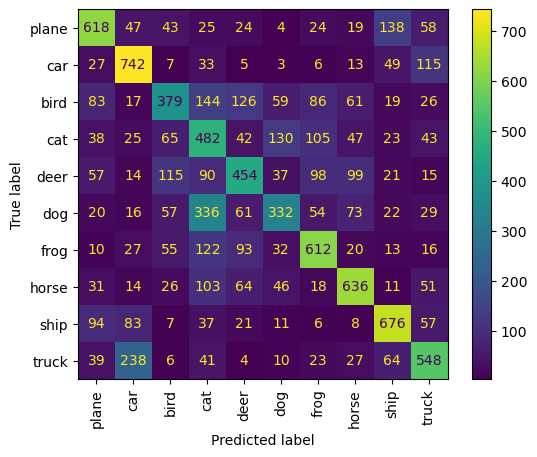

In [12]:
#Generating the confusion matrix
ConfusionMatrixDisplay.from_predictions(true_label, predicted_label, display_labels = true_class, xticks_rotation = 'vertical' )